In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

sns.set(style="whitegrid")


## Load Dataset

In [2]:
df = pd.read_csv("../data/imdb.csv")
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})
df = df[["review", "label"]]


##  Label Distribution

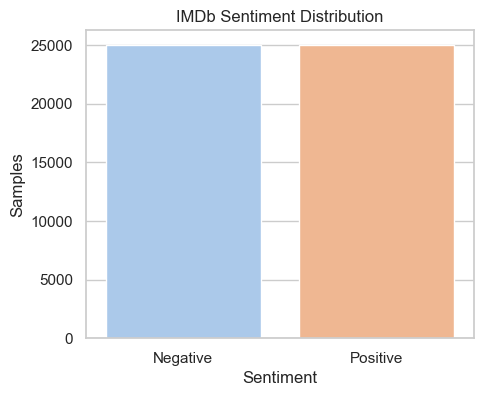

In [5]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="label", palette="pastel")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("IMDb Sentiment Distribution")
plt.ylabel("Samples")
plt.xlabel("Sentiment")
plt.show()


##  Text Length Analysis

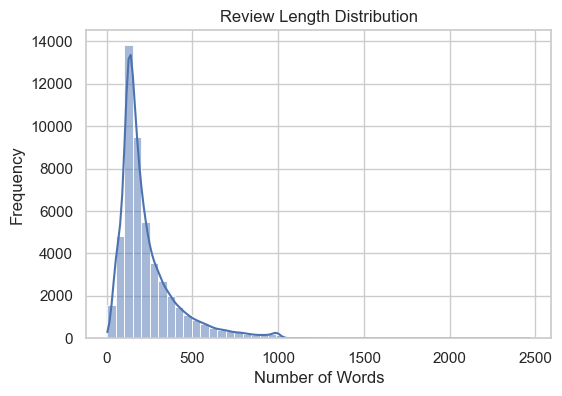

In [6]:
df["text_length"] = df["review"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6, 4))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


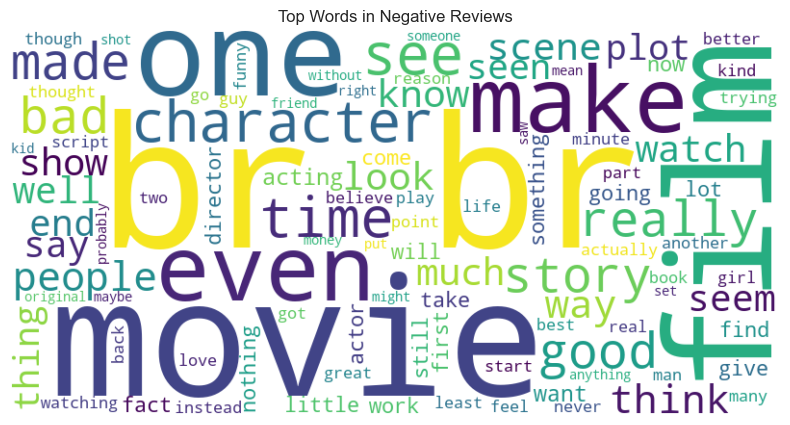

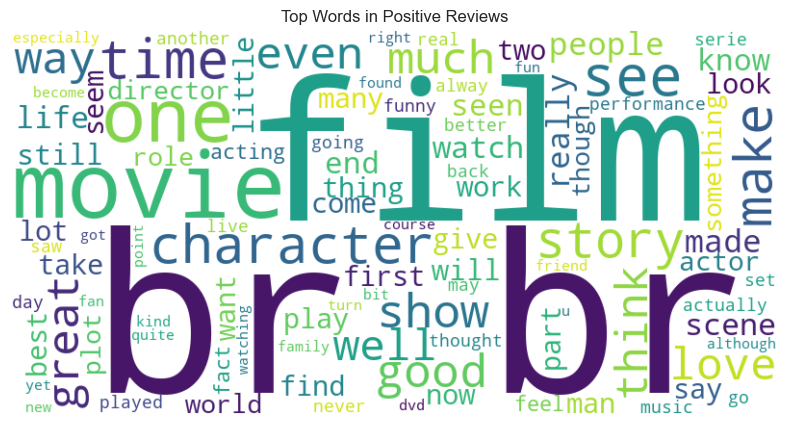

In [7]:
stopwords = set(STOPWORDS)

for label_id, label_name in {0: "Negative", 1: "Positive"}.items():
    subset = df[df["label"] == label_id]
    text_blob = " ".join(subset["review"]).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, max_words=100).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in {label_name} Reviews")
    plt.show()
